## Материалы

В большинстве случаев задачу классификации табличных данных решают градиентным бустингом. Однако в последнее время появились алгоритмы, основанные на трансформерах. Ниже представлены материалы, в которых вы можете узнать больше об этих алгоритмах.

Градиентный бустинг:

*   [Лекция Марии Тихоновой на RuCode 2023](https://docs.yandex.ru/docs/view?url=ya-disk-public%3A%2F%2FC4hP4CAe8HIvcqofLPlLPNReMGm6VNrJ17jYeEG3UOqJWful4ZaLsZCR4U2oclkiW5aDQ4kMZEXE%2BwNjbq78ug%3D%3D&name=%D0%98%D0%BD%D1%82%D0%B5%D0%BD%D1%81%D0%B8%D0%B2%D1%8B%20%D0%BF%D0%BE%20%D1%82%D1%80%D0%B5%D0%BA%D1%83%20%D0%98%D0%98%20%D1%81%D0%B5%D0%B7%D0%BE%D0%BD%D0%B0%20RuCode.%20%D0%A4%D0%B8%D0%BD%D0%B0%D0%BB.xlsx)
*   [Курс по машинному обучению на ods.ai](https://ods.ai/tracks/classic-models-spring24)
* [Статья ШАД Яндекса о градиентном бустинге](https://education.yandex.ru/handbook/ml/article/gradientnyj-busting)

Трансформеры табличных данных:
* [Лекция Марии Тихоновой на RuCode 2023](https://docs.yandex.ru/docs/view?url=ya-disk-public%3A%2F%2FC4hP4CAe8HIvcqofLPlLPNReMGm6VNrJ17jYeEG3UOqJWful4ZaLsZCR4U2oclkiW5aDQ4kMZEXE%2BwNjbq78ug%3D%3D&name=%D0%98%D0%BD%D1%82%D0%B5%D0%BD%D1%81%D0%B8%D0%B2%D1%8B%20%D0%BF%D0%BE%20%D1%82%D1%80%D0%B5%D0%BA%D1%83%20%D0%98%D0%98%20%D1%81%D0%B5%D0%B7%D0%BE%D0%BD%D0%B0%20RuCode.%20%D0%A4%D0%B8%D0%BD%D0%B0%D0%BB.xlsx)
* [Немного об устройстве трансформеров для таблиц](https://t.me/gradientdip/312)



## Данные

Набор данных вы сможете скачать, перейдя по ссылкам: для [train](https://disk.yandex.ru/d/b4uTbr8ha3_blw) и для [public test](https://disk.yandex.ru/d/GEMvphC61oa7dA).

## Метрика

Мера F1 macro.

## Комбинации клавиш в Jupyter Notebook
Tab - смещает выделенный фрагмент кода на одну табуляцию

Shift + Tab убирает одну табуляцию у выделенного фрагмента кода

Esc + Z возвращает удаленную ячейку

Ctrl + / в англоязычной расскладке помещает в комментарии выделенный фрагмент кода

Вызов справки по методам:

## Где взять Val (проверочный) набор?
Обычно часть набора оставляют для проверки качества сети на данных, которые сеть не видела при обучении. Вы можете отложить несколько изображений из обучающего набора данных, а также использовать кросс-валидацию. В коде ниже проверочный набор создается автоматически из имеющихся записей.

# Обучение модели


## Импорт библиотек и распаковка архива

In [ ]:
import pandas as pd
# Определяем работаем ли мы в Google Colaboratory
# если да, то подключаемся к Google Drive и копируем из него архив с данными
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

from pathlib import Path
# Определяем каталог с дополнительными материалами
if IN_COLAB:
    google.colab.drive.mount("/content/drive")

    # Change this if you created the shortcut in a different location
    DATA_ROOT = Path("/content/drive")

    assert DATA_ROOT.is_dir(), "Точно ли вы указали правильный путь в строчке выше?"
else:
    DATA_ROOT = Path(".")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Проверка, где мы все-таки находимся и что тут есть

In [ ]:
#в фигурных скобках переменная из Python, скобки нужны для передачи значения переменной в консольную команду
!ls {'"%s"' % DATA_ROOT}

MyDrive


In [ ]:
# #Если нужно подключать .py модули из папки в Google Drive
# import sys
# sys.path.append('/content/drive/My Drive/Colab Notebooks/')
# #или
# sys.path.append(str(DATA_ROOT))

In [ ]:
# Копируем все файлы из Google Drive в /content/
!cp '{DATA_ROOT}'/* /content/drive/MyDrive

cp: -r not specified; omitting directory '/content/drive/MyDrive'


In [ ]:
!ls /content/

catboost_info  drive  sample_data  wandb


## Решение для задачи регрессии

В файле disease_train.csv 7 видов параметров - 2278 строк. Советуем разделить их на train и val наборы, мы поделили их в соотношении 5 к 1. Экспериментируйте!

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/disease_train.csv')
data_sample = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/disease_sample_submission.csv')
# Вывести первые несколько строк данных
print(data.head())

    X1   X2    X3     X4   X5     X6     X7  Y
0  2.0  2.0  29.4   84.0  2.0   75.0   5.78  0
1  1.0  2.0  33.5  101.0  2.0   64.0   8.74  0
2  1.0  2.0  29.2  101.0  2.0   80.0   9.72  0
3  1.0  2.0  28.7  121.0  2.0  146.0   3.83  0
4  1.0  1.0  25.6   87.0  2.0   82.0  13.90  0


In [ ]:
print(data_sample.head())

    X1   X2    X3     X4   X5     X6     X7  Y
0  1.0  2.0  27.1  102.0  2.0  130.0  12.08  0
1  2.0  2.0  26.1   84.0  2.0   77.0   3.62  1
2  1.0  2.0  20.5  100.0  2.0  100.0  13.18  0
3  1.0  2.0  33.5   97.0  2.0  105.0  13.61  0
4  1.0  2.0  24.4  106.0  2.0  104.0   8.18  0


In [ ]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,Y
count,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000
mean,1.503448,1.820063,28.102320,99.715361,2.020690,115.754232,11.955455,0.160502
std,0.500145,0.408011,7.307291,17.035404,0.194526,47.079751,9.719597,0.367186
min,1.000000,1.000000,14.600000,63.000000,1.000000,40.000000,0.140000,0.000000
25%,1.000000,2.000000,23.000000,92.000000,2.000000,88.000000,5.810000,0.000000
50%,2.000000,2.000000,27.000000,97.000000,2.000000,106.000000,9.090000,0.000000
75%,2.000000,2.000000,31.500000,104.000000,2.000000,131.000000,14.570000,0.000000
max,2.000000,7.000000,70.100000,368.000000,3.000000,503.000000,81.790000,1.000000


In [ ]:
data.groupby('X2').mean()

,X1,X3,X4,X5,X6,X7,Y
X2,,,,,,,
1.0,1.342466,28.613356,100.195205,2.020548,108.445205,11.760685,0.078767
2.0,1.539939,27.993088,99.599846,2.020737,117.431644,12.005061,0.178955
7.0,1.000000,21.100000,110.000000,2.000000,66.000000,4.240000,0.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595 entries, 0 to 1594
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1595 non-null   float64
 1   X2      1595 non-null   float64
 2   X3      1595 non-null   float64
 3   X4      1595 non-null   float64
 4   X5      1595 non-null   float64
 5   X6      1595 non-null   float64
 6   X7      1595 non-null   float64
 7   Y       1595 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 99.8 KB


(8.5, -0.5)

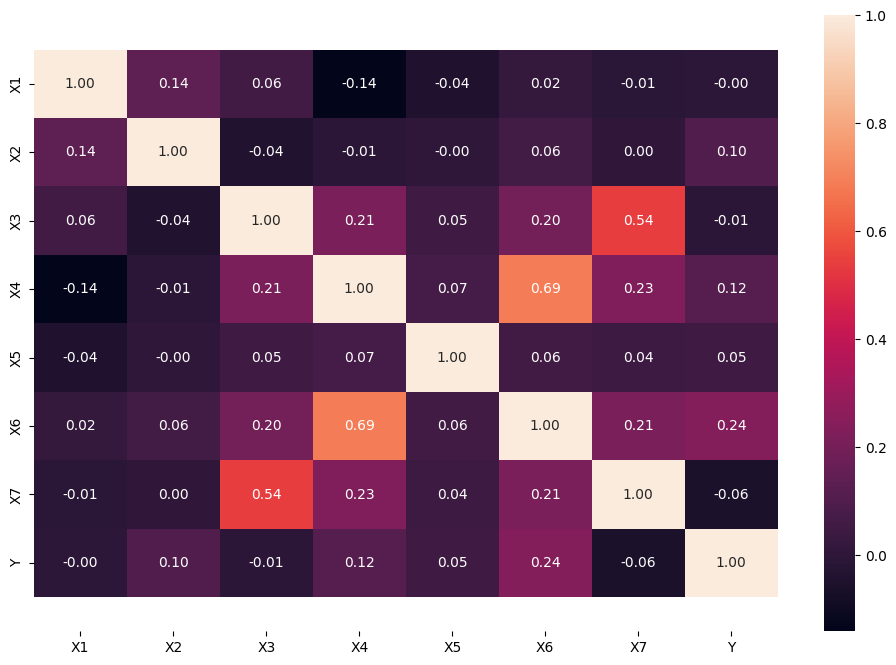

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.figure(figsize = (12,8))
ax = sns.heatmap(data.corr(), annot = True, fmt = ".2f")
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

(8.5, -0.5)

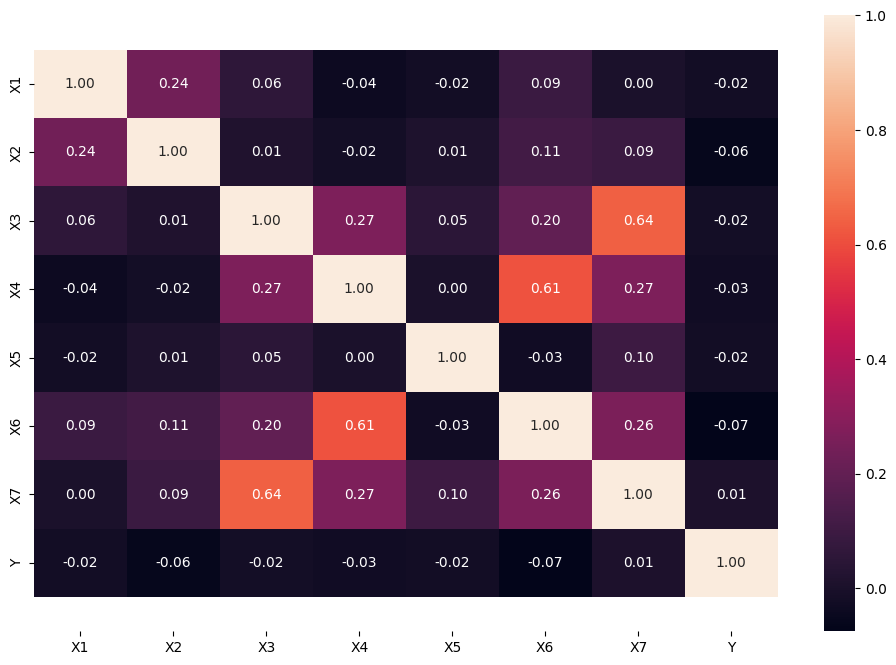

In [ ]:
plt.figure(figsize = (12,8))
ax = sns.heatmap(data_sample.corr(), annot = True, fmt = ".2f")
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

Графики данных

<Axes: >

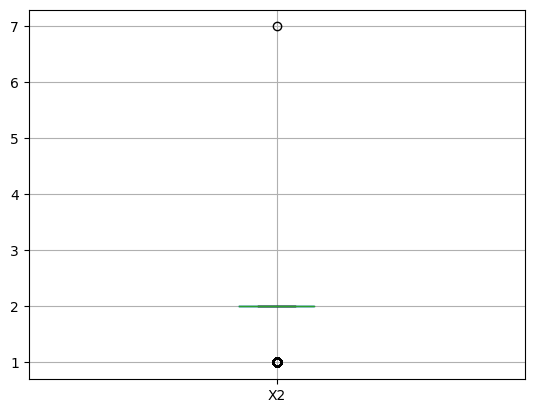

In [ ]:
data.boxplot(column="X2")

** Убираем выбросы у целевых переменных**

In [ ]:
quant = data["X7"].quantile(0.6)# считаем квантиль 90 %
quant_low = data["X7"].quantile(0.01)# считаем квантиль 10 %
df2 = data[data["X7"] < quant] # убираем выбросы по квантилю
df2 = df2[df2["X7"] > quant_low] # убираем выбросы по квантилю
data = df2

In [ ]:
quant = data["X6"].quantile(0.6)# считаем квантиль 90 %
quant_low = data["X6"].quantile(0.01)# считаем квантиль 10 %
df2 = data[data["X6"] < quant] # убираем выбросы по квантилю
df2 = df2[df2["X6"] > quant_low] # убираем выбросы по квантилю
data = df2

In [ ]:
quant = data["X3"].quantile(0.6)# считаем квантиль 90 %
quant_low = data["X3"].quantile(0.01)# считаем квантиль 10 %
df2 = data[data["X3"] < quant] # убираем выбросы по квантилю
df2 = df2[df2["X3"] > quant_low] # убираем выбросы по квантилю
data = df2

In [ ]:
quant = data["X4"].quantile(0.6)# считаем квантиль 90 %
quant_low = data["X4"].quantile(0.01)# считаем квантиль 10 %
df2 = data[data["X4"] < quant] # убираем выбросы по квантилю
df2 = df2[df2["X4"] > quant_low] # убираем выбросы по квантилю
data = df2

<Axes: >

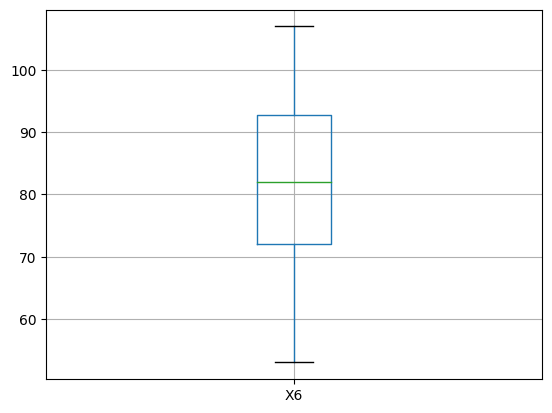

In [ ]:
data.boxplot(column="X6")

<Axes: >

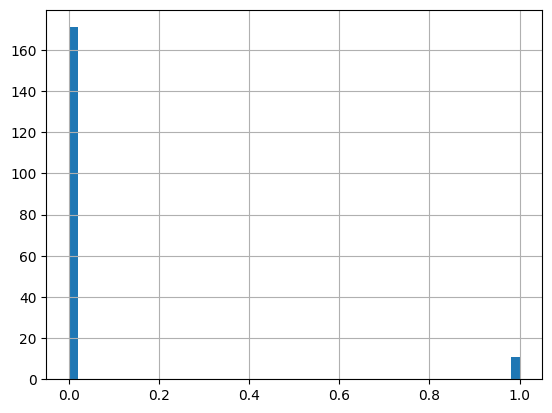

In [ ]:
data["Y"].hist(bins = 50)

<ipython-input-238-40857e377ff9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Y"]);


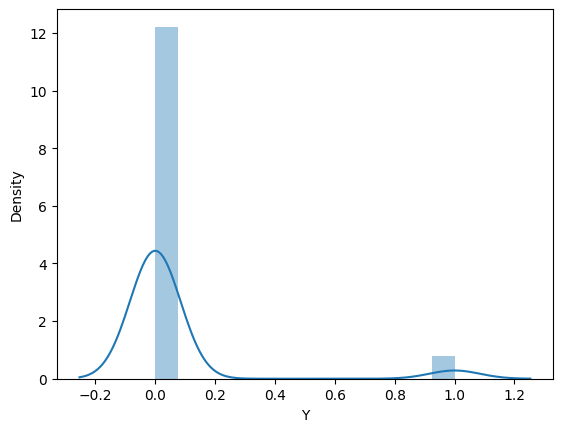

In [ ]:
sns.distplot(data["Y"]);

<Axes: xlabel='X1', ylabel='Y'>

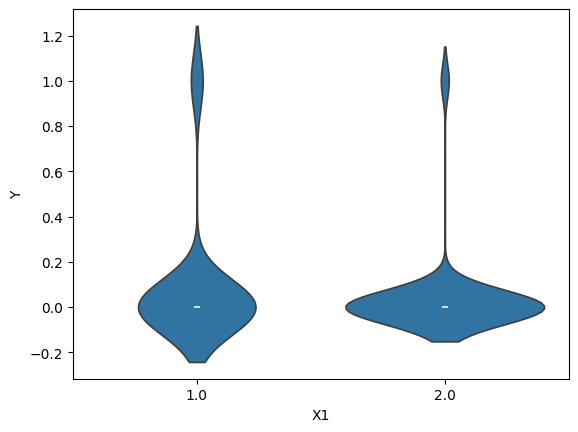

In [ ]:
sns.violinplot(x=data["X1"], y=data["Y"])

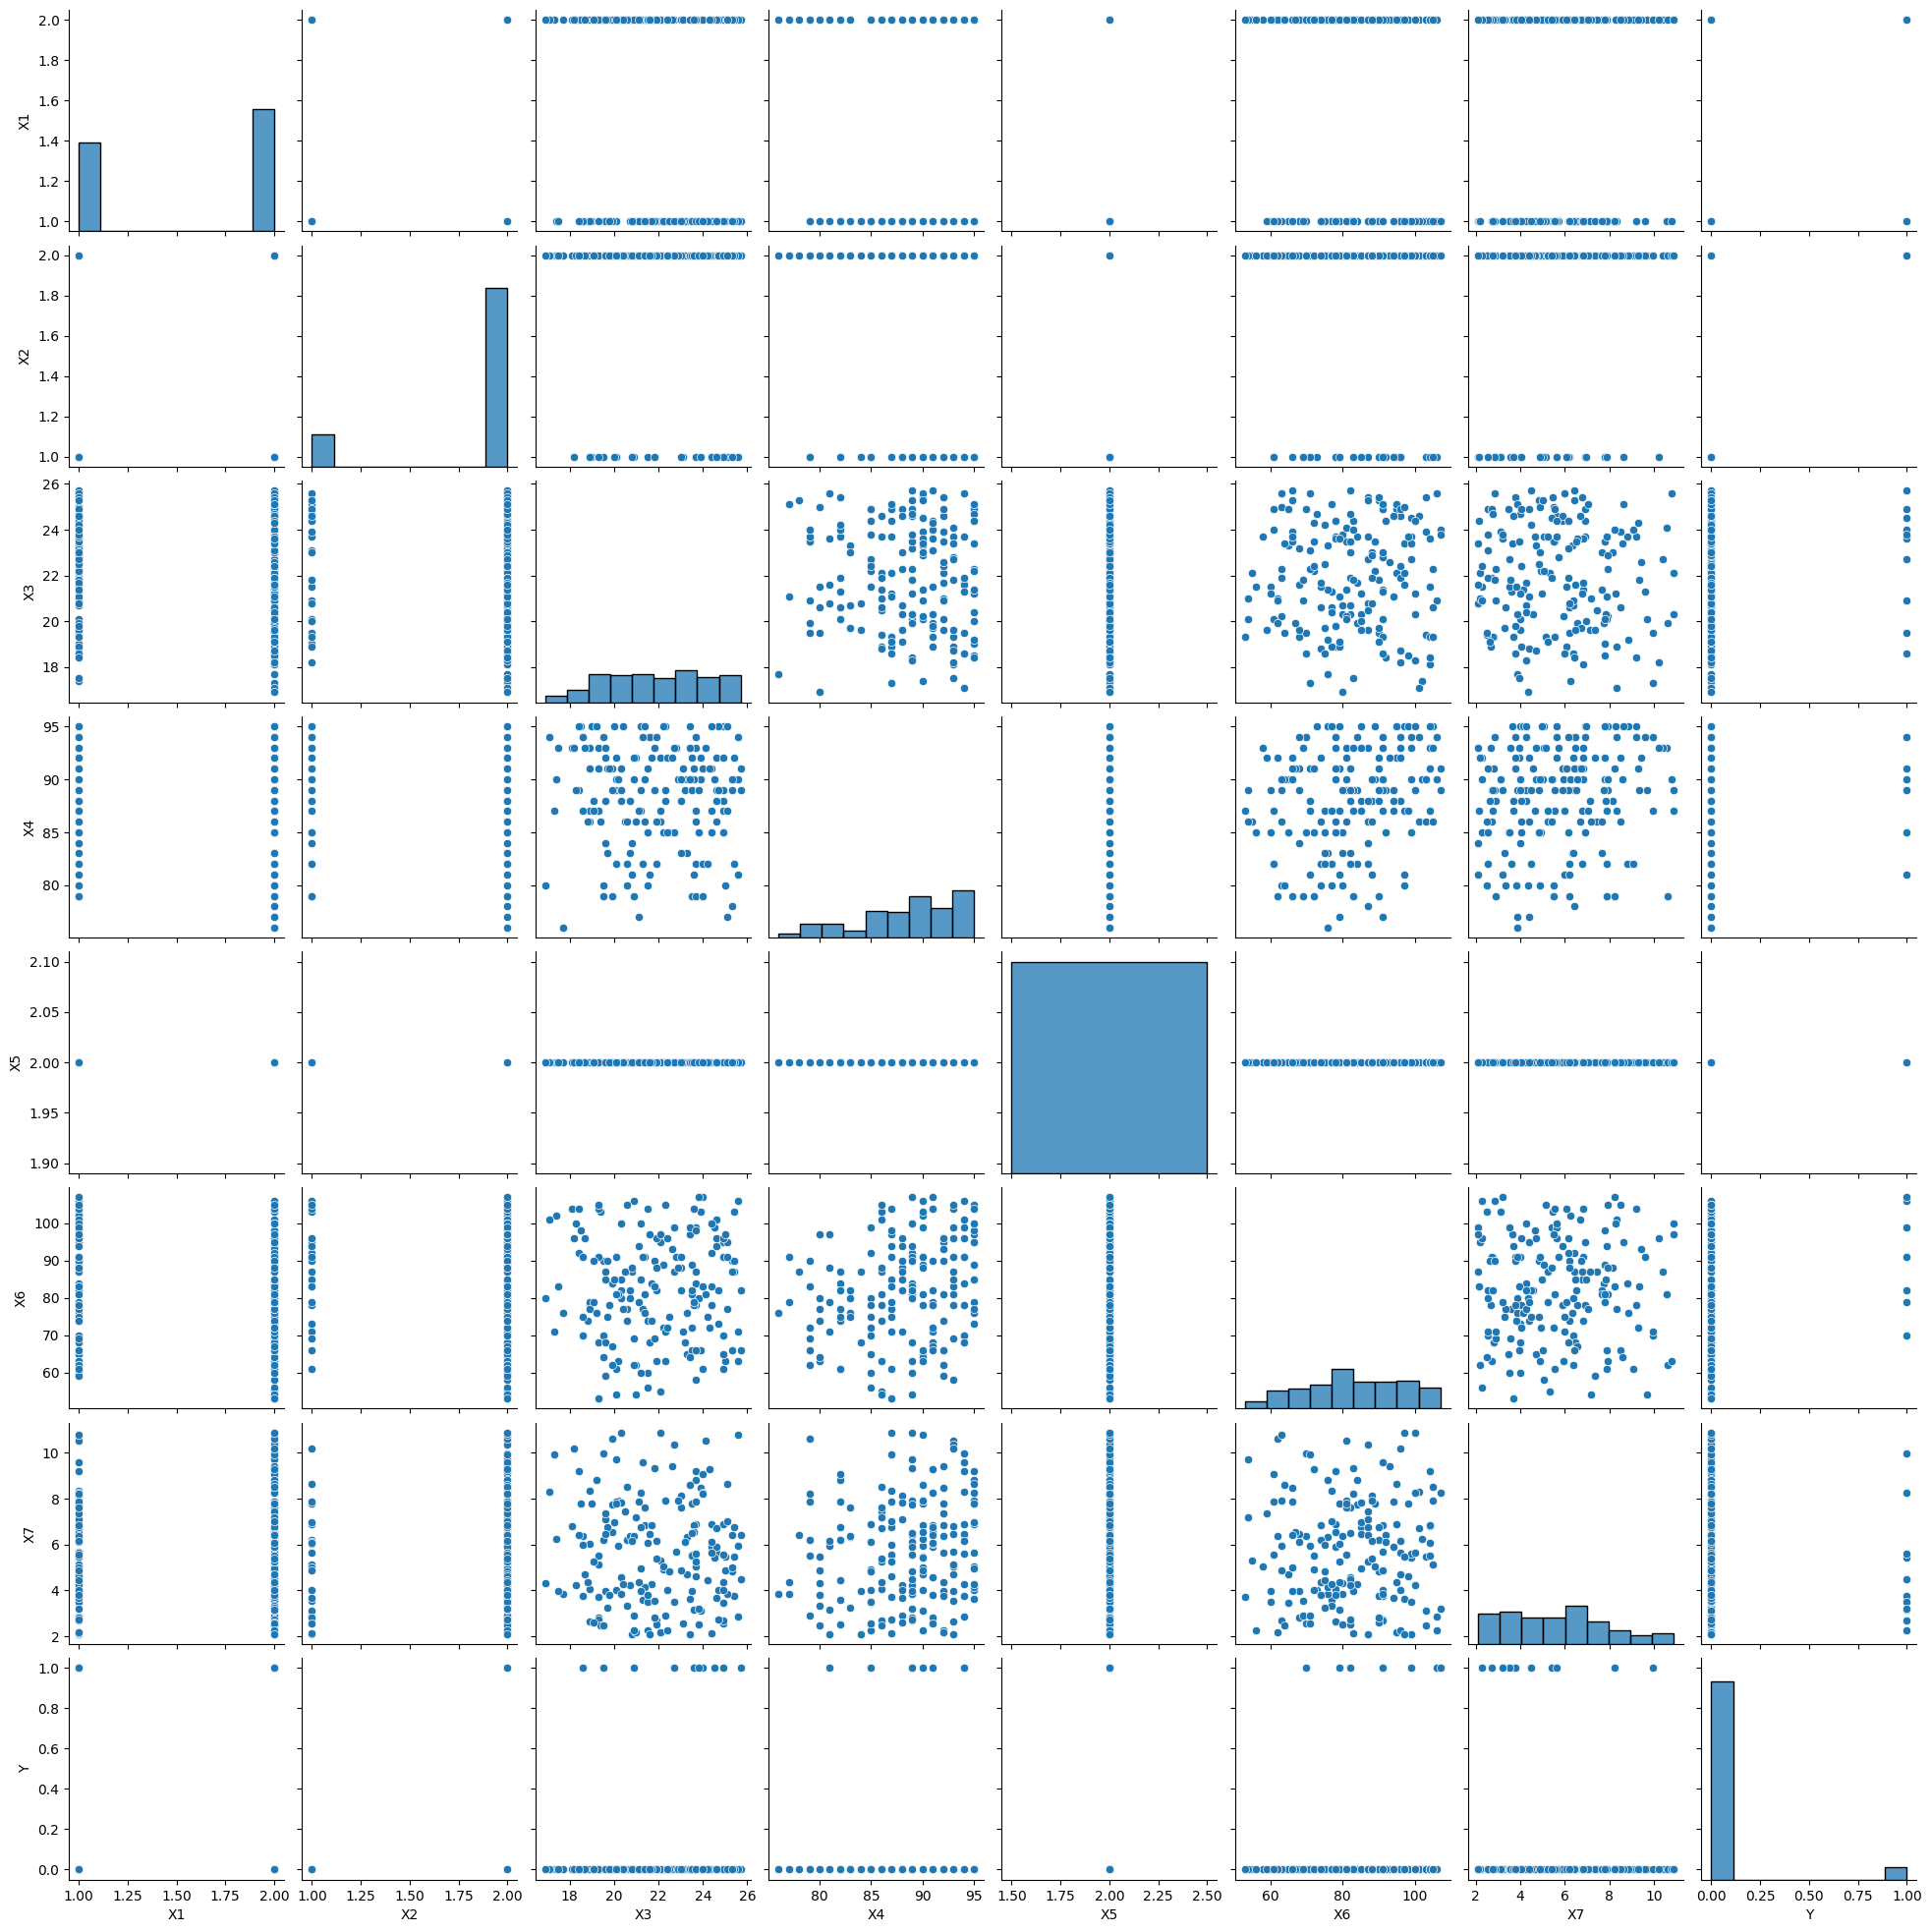

In [ ]:
sns.pairplot(data.iloc[:,:])

Целевая переменная для задачи классификации - Y - "болеет человек или нет?". При обучении вы можете использовать любые столбцы

In [ ]:
y = data['Y'].copy()
print(y.head())

# При обучении мы использовали все 7 параметров, вы можете использовать любые доступные
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']].copy()
print(X.head())

**Разбиение данных на тренировочную и тестовую выборки**

In [ ]:
from sklearn.model_selection import train_test_split

# Разделение на наборы train, val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/disease_public_test.csv')
# Количество параметров должно совпадать с тем, которое использовалось при обучении
 = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']].copy()

**Добавление полиномов до 5 степени**

In [ ]:

#extract the polynomial features
polynomial = PolynomialFeatures(degree=5, include_bias=False)
polynomial.fit(X_train)

X_train_model = polynomial.transform(X_train)
X_test_model = polynomial.transform(X_val)
X_model = polynomial.transform(X)

In [ ]:
#X_train_model = X_train
#X_test_model = X_val

In [ ]:
!pip install catboost

In [ ]:
import numpy as np
from catboost import Pool, CatBoostRegressor

In [ ]:

# initialize Pool
train_pool = Pool(X_train_model,
                  y_train)
test_pool = Pool(X_test_model)

# specify the training parameters
model = CatBoostRegressor(iterations=2,
                          depth=2,
                          learning_rate=1,
                          loss_function='RMSE')
#train the model
model.fit(train_pool)
# make the prediction using the resulting model
preds = model.predict(test_pool)
y_pred2 = []
for pred in preds :
  if pred >= 0.5:
    y_pred2.append(1)
  else:
    y_pred2.append(0)
print(y_pred2[:25])
print(preds)
#print(model.score(X_test_model, y_val))
res = f1_score(y_val, y_pred2, average='macro')
print(res)

In [ ]:
from catboost import CatBoostClassifier, Pool
# initialize Pool
test_data= Pool(X_train_model,
                  y_train)
test_pool = Pool(X_test_model)
model = CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)
# train the model
model.fit(X_train_model,y_train)
# make the prediction using the resulting model
preds = model.predict(test_pool)

preds_proba = model.predict_proba(test_pool)
print("class = ", preds_class)
print("proba = ", preds_proba)

y_pred2 = []
for pred in preds :
  if pred >= 0.5:
    y_pred2.append(1)
  else:
    y_pred2.append(0)
print(y_pred2[:25])
print(preds)
#print(model.score(X_test_model, y_val))
res = f1_score(y_val, y_pred2, average='macro')
print(res)



**Градиентный бустинг** sklearn

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
modelGB = GradientBoostingClassifier()
modelGB.fit(X_train_model, y_train)
#print(modelGB.score(X_test_model, y_val))
preds = modelGB.predict_proba(X_test_model)[:, 1]
print(preds[:5])
print(y_val[:5])
y_pred2 = []
for pred in preds :
  if pred >= 0.5:
    y_pred2.append(1)
  else:
    y_pred2.append(0)
# Результат
res = f1_score(y_val, y_pred2, average='macro')
print("f1_score = ")
print(res)


#Тестирование модели и сохранение файла .csv

In [ ]:
y_pred = modelGB.predict_proba(X_model)[:, 1]
y_pred2 = []
for pred in y_pred:
  if pred >= 0.5:
    y_pred2.append(1)
  else:
    y_pred2.append(0)
print(y_pred2[:25])


Сохраняем словарь в виде файла .csv сразу на диск

In [ ]:
import os

X['Y'] = y_pred2
file_path = os.path.join('/content/drive/MyDrive/ColabNotebooks/', 'public_test_predict.csv')
X.to_csv(file_path, index=False)